All trajectories are converging to y ≈ 0.305092
The trajectory that takes the longest to converge reaches the convergence point at time step 1559, with y-value 0.305092
x_crit[3] = 0.30025771, beta_crit[3] = 85.5175647, beta_p = 0.1, x_fixed_point = 0.305092, beta = 85.4175647, tau = 1559


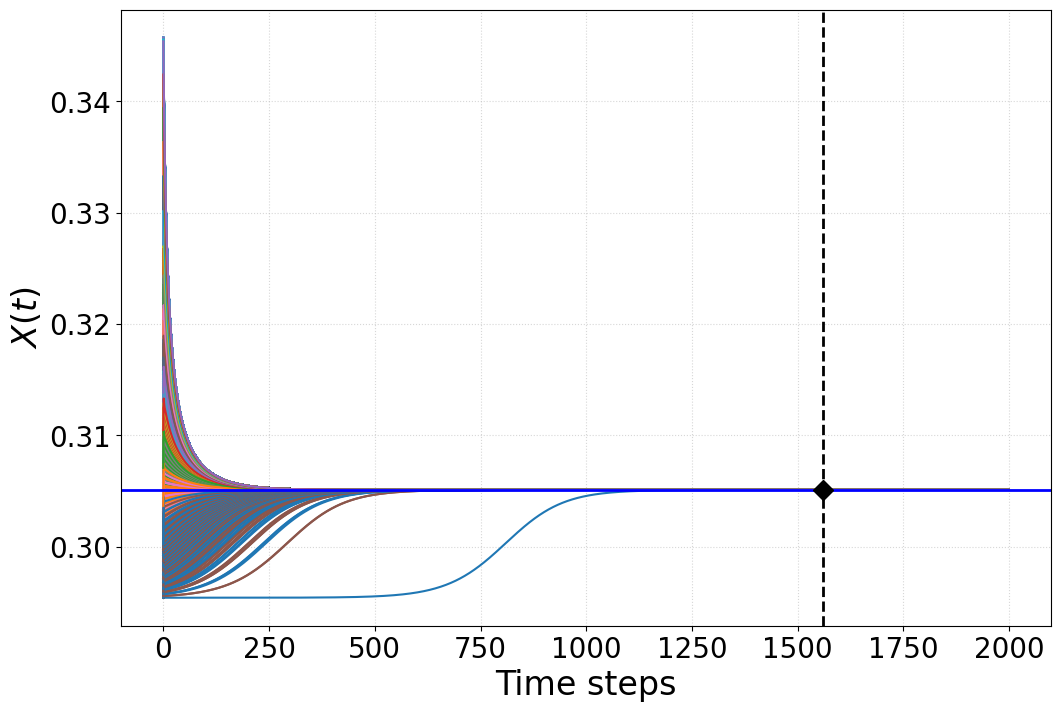

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

# Define the system parameters
R = 1.2
k1 = 0.5
k2 = 1.1
k3 = 0.01

def x_next(x_tm1, x_tm2, x_tm3, v_00, beta):
    g1_tm1 = -(v_00*0.5)*(x_tm1 - k1)**2
    g2_tm1 = -(v_00*0.5)*(x_tm1 - k2 * (np.tanh(x_tm3)) - k3 * (x_tm3))**2
    
    exp_beta_g1 = np.exp(beta * g1_tm1)
    exp_beta_g2 = np.exp(beta * g2_tm1)
    
    n1_tm1 = 1 / (1 + np.exp(beta*(g2_tm1 - g1_tm1)))
    n2_tm1 = 1 - n1_tm1
    
    h1 = k1
    h2 = k2 * (np.tanh(x_tm1)) + k3 * (x_tm1)
    
    x_next_val = (1 / R) * (n1_tm1 * h1 + n2_tm1 * h2)
    
    return x_next_val

def trajectory(x_crit, beta, v_00, epsilon_tm3, epsilon_tm2, epsilon_tm1, num_steps=2000):
    traj = []
    x_tm3 = x_crit + epsilon_tm3
    x_tm2 = x_crit + epsilon_tm2
    x_tm1 = x_crit + epsilon_tm1
    
    for _ in range(num_steps):
        y_t = x_next(x_tm1, x_tm2, x_tm3, v_00, beta)
        traj.append(y_t)
        x_tm3, x_tm2, x_tm1 = x_tm2, x_tm1, y_t
    
    return traj

# Define the critical values
beta_crit1 =np.array([111.85398175, 104.65733217, 85.40767596, 56.57057132, 29.06988374, 11.15691569])  
x_crit1 =np.array([0.06087668, 0.06092509, 0.06058729, 0.06104582, 0.06116604, 0.06132633])

beta_crit =np.array([169.08988624, 158.21077635, 129.11126391, 85.5175647, 43.94474309, 16.86573322])
x_crit =np.array([0.30022213, 0.30033455, 0.30017411, 0.30025771, 0.30035575, 0.30035233])

v_00 = np.array([0.40259952553523665, 0.43028426853378515, 0.527261813052645, 0.7960417160985619, 1.5491185672214862, 4.0363271071404885])

# Choose the index i manually (0 to 10)
i = 3  # Change this value to select a different beta_crit, x_crit, and v_00

# Fix beta_p
beta_p = 0.1  # You can adjust this value as needed
beta = beta_crit[i] - beta_p

# Define ranges for epsilon values
epsilon_range = np.linspace(-0.004846777, 0.05, 15)  # Adjust the range and number of values as needed

def check_convergence(traj, tolerance=1e-8, window=20):

    if len(traj) < window:
        return None
    
    for idx in range(len(traj) - window):
        if np.std(traj[idx:idx+window]) < tolerance:
            return (idx, np.mean(traj[idx:idx+window]))
    
    return None

# Calculate trajectories and check convergence
trajectories = []
convergence_points = []

for eps_tm3 in epsilon_range:
    for eps_tm2 in epsilon_range:
        for eps_tm1 in epsilon_range:
            traj = trajectory(x_crit[i], beta, v_00[i], eps_tm3, eps_tm2, eps_tm1)
            trajectories.append((traj, eps_tm3, eps_tm2, eps_tm1))
            
            conv_point = check_convergence(traj)
            if conv_point:
                convergence_points.append(conv_point)

# Find the overall convergence y-value
if convergence_points:
    overall_convergence_y = np.mean([point[1] for point in convergence_points])
    print(f"All trajectories are converging to y ≈ {overall_convergence_y:.6f}")

    # Find the trajectory that takes the longest time to converge
    slowest_convergence = max(convergence_points, key=lambda x: x[0])
    print(f"The trajectory that takes the longest to converge reaches the convergence point at time step {slowest_convergence[0]}, with y-value {slowest_convergence[1]:.6f}")
else:
    print("No convergence detected in the given number of steps.")
print(f"x_crit[{i}] = {x_crit[i]}, beta_crit[{i}] = {beta_crit[i]}, beta_p = {beta_p}, x_fixed_point = {overall_convergence_y:.6f}, beta = {beta}, tau = {slowest_convergence[0]}")

# Plotting
plt.figure(figsize=(12, 8))
for j, (traj, eps_tm3, eps_tm2, eps_tm1) in enumerate(trajectories):
    plt.plot(range(len(traj)), traj)

if convergence_points:
    plt.axhline(y=overall_convergence_y, color='blue', linewidth=2, linestyle='-')
    plt.axvline(x=slowest_convergence[0], color='black', linewidth=2, linestyle='--')
    plt.plot(slowest_convergence[0], slowest_convergence[1], 'kD', markersize=10)

plt.grid(True, linestyle=':', alpha=0.5)
plt.xticks(fontsize=20)
#plt.tick_params(axis='both', which='major', labelsize=20)
plt.yticks(fontsize=20)
#xticks = [0, 100, 200, 300, 400, 479, 500 ]
#plt.xticks(xticks, ['0', '100', '200', '300', '400', r'$\tau_r$', '500'])

#yticks = [0.28, 0.29, 0.30, 0.31, 0.319878, 0.32, 0.33, 0.34, 0.35 ]
#plt.yticks(yticks, ['0.28','0.29', '0.30', '0.31', r'$x^{*}$', '','0.33','0.34','0.35'])

plt.xlabel('Time steps', fontsize=24)
plt.ylabel(r'$X(t)$', fontsize=24)
#plt.xlim(0, 320)
#plt.ylim(0.27,0.35)
plt.savefig('n=3_trajectories_betap=0.1.jpg', dpi=300, bbox_inches='tight')

plt.show()

All trajectories are converging to y ≈ 0.306945
The trajectory that takes the longest to converge reaches the convergence point at time step 1172, with y-value 0.306945
x_crit[3] = 0.30025771, beta_crit[3] = 85.5175647, beta_p = 0.2, x_fixed_point = 0.306945, beta = 85.31756469999999, tau = 1172


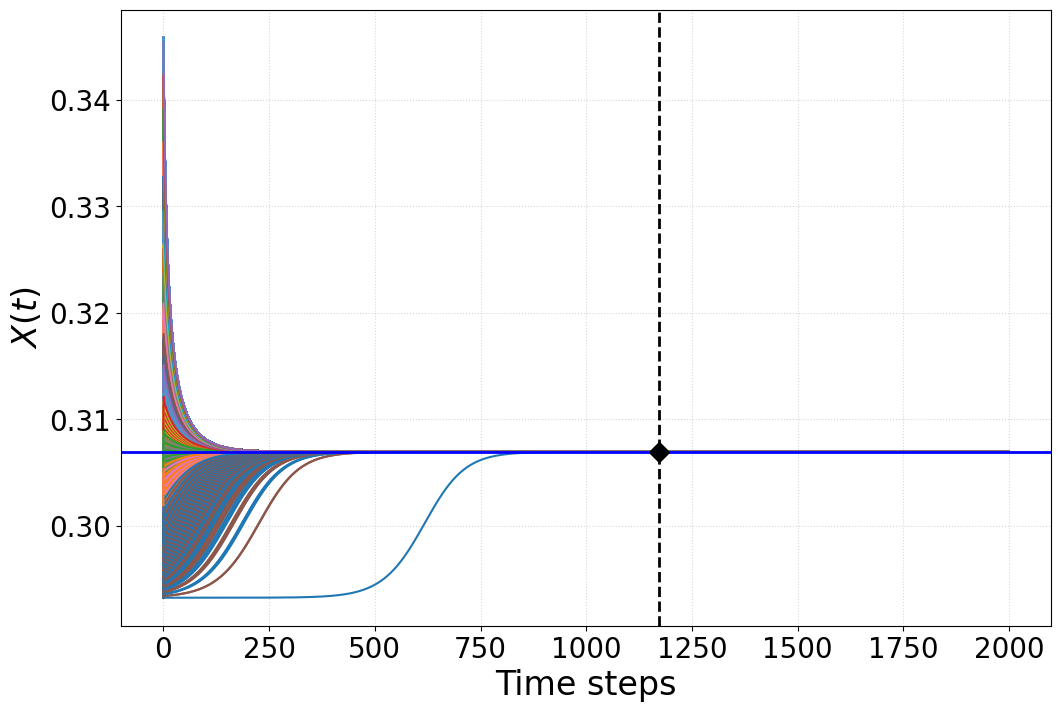

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

# Define the system parameters
R = 1.2
k1 = 0.5
k2 = 1.1
k3 = 0.01

def x_next(x_tm1, x_tm2, x_tm3, v_00, beta):
    g1_tm1 = -(v_00*0.5)*(x_tm1 - k1)**2
    g2_tm1 = -(v_00*0.5)*(x_tm1 - k2 * (np.tanh(x_tm3)) - k3 * (x_tm3))**2
    
    exp_beta_g1 = np.exp(beta * g1_tm1)
    exp_beta_g2 = np.exp(beta * g2_tm1)
    
    n1_tm1 = 1 / (1 + np.exp(beta*(g2_tm1 - g1_tm1)))
    n2_tm1 = 1 - n1_tm1
    
    h1 = k1
    h2 = k2 * (np.tanh(x_tm1)) + k3 * (x_tm1)
    
    x_next_val = (1 / R) * (n1_tm1 * h1 + n2_tm1 * h2)
    
    return x_next_val

def trajectory(x_crit, beta, v_00, epsilon_tm3, epsilon_tm2, epsilon_tm1, num_steps=2000):
    traj = []
    x_tm3 = x_crit + epsilon_tm3
    x_tm2 = x_crit + epsilon_tm2
    x_tm1 = x_crit + epsilon_tm1
    
    for _ in range(num_steps):
        y_t = x_next(x_tm1, x_tm2, x_tm3, v_00, beta)
        traj.append(y_t)
        x_tm3, x_tm2, x_tm1 = x_tm2, x_tm1, y_t
    
    return traj

# Define the critical values
beta_crit1 =np.array([111.85398175, 104.65733217, 85.40767596, 56.57057132, 29.06988374, 11.15691569])  
x_crit1 =np.array([0.06087668, 0.06092509, 0.06058729, 0.06104582, 0.06116604, 0.06132633])

beta_crit =np.array([169.08988624, 158.21077635, 129.11126391, 85.5175647, 43.94474309, 16.86573322])
x_crit =np.array([0.30022213, 0.30033455, 0.30017411, 0.30025771, 0.30035575, 0.30035233])

v_00 = np.array([0.40259952553523665, 0.43028426853378515, 0.527261813052645, 0.7960417160985619, 1.5491185672214862, 4.0363271071404885])

# Choose the index i manually (0 to 10)
i = 3  # Change this value to select a different beta_crit, x_crit, and v_00

# Fix beta_p
beta_p = 0.2  # You can adjust this value as needed
beta = beta_crit[i] - beta_p

# Define ranges for epsilon values
epsilon_range = np.linspace(-0.007016050, 0.05, 15)  # Adjust the range and number of values as needed

def check_convergence(traj, tolerance=1e-8, window=20):

    if len(traj) < window:
        return None
    
    for idx in range(len(traj) - window):
        if np.std(traj[idx:idx+window]) < tolerance:
            return (idx, np.mean(traj[idx:idx+window]))
    
    return None

# Calculate trajectories and check convergence
trajectories = []
convergence_points = []

for eps_tm3 in epsilon_range:
    for eps_tm2 in epsilon_range:
        for eps_tm1 in epsilon_range:
            traj = trajectory(x_crit[i], beta, v_00[i], eps_tm3, eps_tm2, eps_tm1)
            trajectories.append((traj, eps_tm3, eps_tm2, eps_tm1))
            
            conv_point = check_convergence(traj)
            if conv_point:
                convergence_points.append(conv_point)

# Find the overall convergence y-value
if convergence_points:
    overall_convergence_y = np.mean([point[1] for point in convergence_points])
    print(f"All trajectories are converging to y ≈ {overall_convergence_y:.6f}")

    # Find the trajectory that takes the longest time to converge
    slowest_convergence = max(convergence_points, key=lambda x: x[0])
    print(f"The trajectory that takes the longest to converge reaches the convergence point at time step {slowest_convergence[0]}, with y-value {slowest_convergence[1]:.6f}")
else:
    print("No convergence detected in the given number of steps.")
print(f"x_crit[{i}] = {x_crit[i]}, beta_crit[{i}] = {beta_crit[i]}, beta_p = {beta_p}, x_fixed_point = {overall_convergence_y:.6f}, beta = {beta}, tau = {slowest_convergence[0]}")

# Plotting
plt.figure(figsize=(12, 8))
for j, (traj, eps_tm3, eps_tm2, eps_tm1) in enumerate(trajectories):
    plt.plot(range(len(traj)), traj)

if convergence_points:
    plt.axhline(y=overall_convergence_y, color='blue', linewidth=2, linestyle='-')
    plt.axvline(x=slowest_convergence[0], color='black', linewidth=2, linestyle='--')
    plt.plot(slowest_convergence[0], slowest_convergence[1], 'kD', markersize=10)

plt.grid(True, linestyle=':', alpha=0.5)
plt.xticks(fontsize=20)
#plt.tick_params(axis='both', which='major', labelsize=20)
plt.yticks(fontsize=20)
#xticks = [0, 100, 200, 300, 400, 479, 500 ]
#plt.xticks(xticks, ['0', '100', '200', '300', '400', r'$\tau_r$', '500'])

#yticks = [0.28, 0.29, 0.30, 0.31, 0.319878, 0.32, 0.33, 0.34, 0.35 ]
#plt.yticks(yticks, ['0.28','0.29', '0.30', '0.31', r'$x^{*}$', '','0.33','0.34','0.35'])

plt.xlabel('Time steps', fontsize=24)
plt.ylabel(r'$X(t)$', fontsize=24)
#plt.xlim(0, 320)
#plt.ylim(0.27,0.35)
plt.savefig('n=3_trajectories_betap=0.2.jpg', dpi=300, bbox_inches='tight')

plt.show()

All trajectories are converging to y ≈ 0.308336
The trajectory that takes the longest to converge reaches the convergence point at time step 991, with y-value 0.308335
x_crit[3] = 0.30025771, beta_crit[3] = 85.5175647, beta_p = 0.3, x_fixed_point = 0.308336, beta = 85.2175647, tau = 991


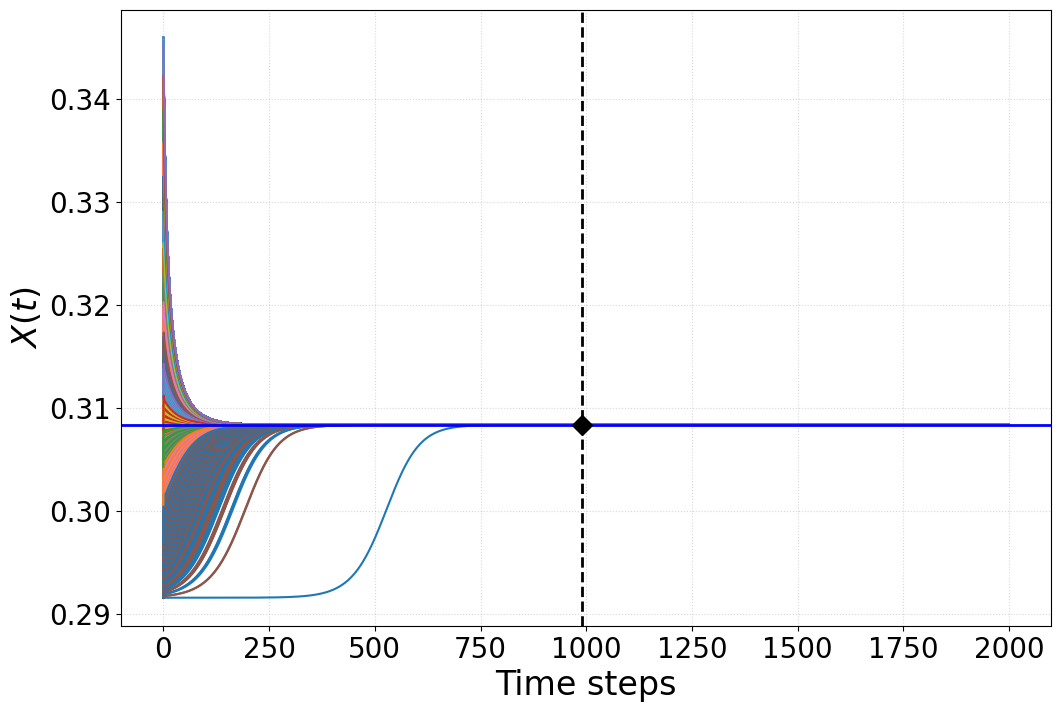

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

# Define the system parameters
R = 1.2
k1 = 0.5
k2 = 1.1
k3 = 0.01

def x_next(x_tm1, x_tm2, x_tm3, v_00, beta):
    g1_tm1 = -(v_00*0.5)*(x_tm1 - k1)**2
    g2_tm1 = -(v_00*0.5)*(x_tm1 - k2 * (np.tanh(x_tm3)) - k3 * (x_tm3))**2
    
    exp_beta_g1 = np.exp(beta * g1_tm1)
    exp_beta_g2 = np.exp(beta * g2_tm1)
    
    n1_tm1 = 1 / (1 + np.exp(beta*(g2_tm1 - g1_tm1)))
    n2_tm1 = 1 - n1_tm1
    
    h1 = k1
    h2 = k2 * (np.tanh(x_tm1)) + k3 * (x_tm1)
    
    x_next_val = (1 / R) * (n1_tm1 * h1 + n2_tm1 * h2)
    
    return x_next_val

def trajectory(x_crit, beta, v_00, epsilon_tm3, epsilon_tm2, epsilon_tm1, num_steps=2000):
    traj = []
    x_tm3 = x_crit + epsilon_tm3
    x_tm2 = x_crit + epsilon_tm2
    x_tm1 = x_crit + epsilon_tm1
    
    for _ in range(num_steps):
        y_t = x_next(x_tm1, x_tm2, x_tm3, v_00, beta)
        traj.append(y_t)
        x_tm3, x_tm2, x_tm1 = x_tm2, x_tm1, y_t
    
    return traj

# Define the critical values
beta_crit1 =np.array([111.85398175, 104.65733217, 85.40767596, 56.57057132, 29.06988374, 11.15691569])  
x_crit1 =np.array([0.06087668, 0.06092509, 0.06058729, 0.06104582, 0.06116604, 0.06132633])

beta_crit =np.array([169.08988624, 158.21077635, 129.11126391, 85.5175647, 43.94474309, 16.86573322])
x_crit =np.array([0.30022213, 0.30033455, 0.30017411, 0.30025771, 0.30035575, 0.30035233])

v_00 = np.array([0.40259952553523665, 0.43028426853378515, 0.527261813052645, 0.7960417160985619, 1.5491185672214862, 4.0363271071404885])

# Choose the index i manually (0 to 10)
i = 3  # Change this value to select a different beta_crit, x_crit, and v_00

# Fix beta_p
beta_p = 0.3  # You can adjust this value as needed
beta = beta_crit[i] - beta_p

# Define ranges for epsilon values
epsilon_range = np.linspace(-0.008723263, 0.05, 15)  # Adjust the range and number of values as needed

def check_convergence(traj, tolerance=1e-8, window=20):

    if len(traj) < window:
        return None
    
    for idx in range(len(traj) - window):
        if np.std(traj[idx:idx+window]) < tolerance:
            return (idx, np.mean(traj[idx:idx+window]))
    
    return None

# Calculate trajectories and check convergence
trajectories = []
convergence_points = []

for eps_tm3 in epsilon_range:
    for eps_tm2 in epsilon_range:
        for eps_tm1 in epsilon_range:
            traj = trajectory(x_crit[i], beta, v_00[i], eps_tm3, eps_tm2, eps_tm1)
            trajectories.append((traj, eps_tm3, eps_tm2, eps_tm1))
            
            conv_point = check_convergence(traj)
            if conv_point:
                convergence_points.append(conv_point)

# Find the overall convergence y-value
if convergence_points:
    overall_convergence_y = np.mean([point[1] for point in convergence_points])
    print(f"All trajectories are converging to y ≈ {overall_convergence_y:.6f}")

    # Find the trajectory that takes the longest time to converge
    slowest_convergence = max(convergence_points, key=lambda x: x[0])
    print(f"The trajectory that takes the longest to converge reaches the convergence point at time step {slowest_convergence[0]}, with y-value {slowest_convergence[1]:.6f}")
else:
    print("No convergence detected in the given number of steps.")
print(f"x_crit[{i}] = {x_crit[i]}, beta_crit[{i}] = {beta_crit[i]}, beta_p = {beta_p}, x_fixed_point = {overall_convergence_y:.6f}, beta = {beta}, tau = {slowest_convergence[0]}")

# Plotting
plt.figure(figsize=(12, 8))
for j, (traj, eps_tm3, eps_tm2, eps_tm1) in enumerate(trajectories):
    plt.plot(range(len(traj)), traj)

if convergence_points:
    plt.axhline(y=overall_convergence_y, color='blue', linewidth=2, linestyle='-')
    plt.axvline(x=slowest_convergence[0], color='black', linewidth=2, linestyle='--')
    plt.plot(slowest_convergence[0], slowest_convergence[1], 'kD', markersize=10)

plt.grid(True, linestyle=':', alpha=0.5)
plt.xticks(fontsize=20)
#plt.tick_params(axis='both', which='major', labelsize=20)
plt.yticks(fontsize=20)
#xticks = [0, 100, 200, 300, 400, 479, 500 ]
#plt.xticks(xticks, ['0', '100', '200', '300', '400', r'$\tau_r$', '500'])

#yticks = [0.28, 0.29, 0.30, 0.31, 0.319878, 0.32, 0.33, 0.34, 0.35 ]
#plt.yticks(yticks, ['0.28','0.29', '0.30', '0.31', r'$x^{*}$', '','0.33','0.34','0.35'])

plt.xlabel('Time steps', fontsize=24)
plt.ylabel(r'$X(t)$', fontsize=24)
#plt.xlim(0, 320)
#plt.ylim(0.27,0.35)
plt.savefig('n=3_trajectories_betap=0.3.jpg', dpi=300, bbox_inches='tight')

plt.show()

All trajectories are converging to y ≈ 0.309487
The trajectory that takes the longest to converge reaches the convergence point at time step 879, with y-value 0.309487
x_crit[3] = 0.30025771, beta_crit[3] = 85.5175647, beta_p = 0.4, x_fixed_point = 0.309487, beta = 85.11756469999999, tau = 879


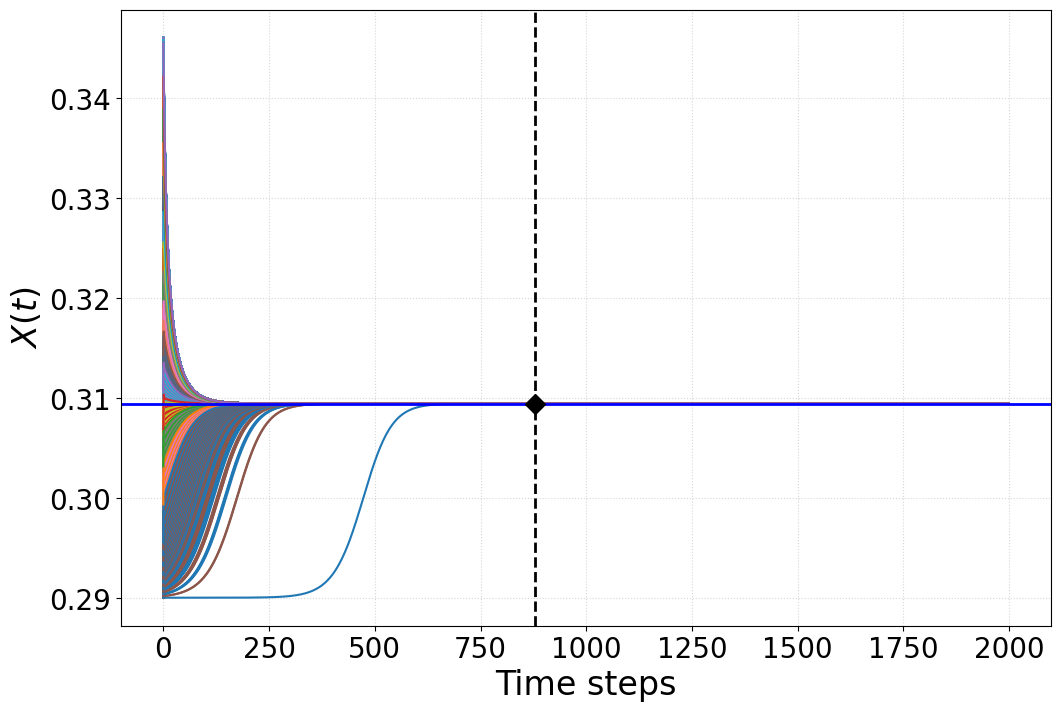

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

# Define the system parameters
R = 1.2
k1 = 0.5
k2 = 1.1
k3 = 0.01

def x_next(x_tm1, x_tm2, x_tm3, v_00, beta):
    g1_tm1 = -(v_00*0.5)*(x_tm1 - k1)**2
    g2_tm1 = -(v_00*0.5)*(x_tm1 - k2 * (np.tanh(x_tm3)) - k3 * (x_tm3))**2
    
    exp_beta_g1 = np.exp(beta * g1_tm1)
    exp_beta_g2 = np.exp(beta * g2_tm1)
    
    n1_tm1 = 1 / (1 + np.exp(beta*(g2_tm1 - g1_tm1)))
    n2_tm1 = 1 - n1_tm1
    
    h1 = k1
    h2 = k2 * (np.tanh(x_tm1)) + k3 * (x_tm1)
    
    x_next_val = (1 / R) * (n1_tm1 * h1 + n2_tm1 * h2)
    
    return x_next_val

def trajectory(x_crit, beta, v_00, epsilon_tm3, epsilon_tm2, epsilon_tm1, num_steps=2000):
    traj = []
    x_tm3 = x_crit + epsilon_tm3
    x_tm2 = x_crit + epsilon_tm2
    x_tm1 = x_crit + epsilon_tm1
    
    for _ in range(num_steps):
        y_t = x_next(x_tm1, x_tm2, x_tm3, v_00, beta)
        traj.append(y_t)
        x_tm3, x_tm2, x_tm1 = x_tm2, x_tm1, y_t
    
    return traj

# Define the critical values
beta_crit1 =np.array([111.85398175, 104.65733217, 85.40767596, 56.57057132, 29.06988374, 11.15691569])  
x_crit1 =np.array([0.06087668, 0.06092509, 0.06058729, 0.06104582, 0.06116604, 0.06132633])

beta_crit =np.array([169.08988624, 158.21077635, 129.11126391, 85.5175647, 43.94474309, 16.86573322])
x_crit =np.array([0.30022213, 0.30033455, 0.30017411, 0.30025771, 0.30035575, 0.30035233])

v_00 = np.array([0.40259952553523665, 0.43028426853378515, 0.527261813052645, 0.7960417160985619, 1.5491185672214862, 4.0363271071404885])

# Choose the index i manually (0 to 10)
i = 3  # Change this value to select a different beta_crit, x_crit, and v_00

# Fix beta_p
beta_p = 0.4  # You can adjust this value as needed
beta = beta_crit[i] - beta_p

# Define ranges for epsilon values
epsilon_range = np.linspace(-0.010192295, 0.05, 15)  # Adjust the range and number of values as needed

def check_convergence(traj, tolerance=1e-8, window=20):

    if len(traj) < window:
        return None
    
    for idx in range(len(traj) - window):
        if np.std(traj[idx:idx+window]) < tolerance:
            return (idx, np.mean(traj[idx:idx+window]))
    
    return None

# Calculate trajectories and check convergence
trajectories = []
convergence_points = []

for eps_tm3 in epsilon_range:
    for eps_tm2 in epsilon_range:
        for eps_tm1 in epsilon_range:
            traj = trajectory(x_crit[i], beta, v_00[i], eps_tm3, eps_tm2, eps_tm1)
            trajectories.append((traj, eps_tm3, eps_tm2, eps_tm1))
            
            conv_point = check_convergence(traj)
            if conv_point:
                convergence_points.append(conv_point)

# Find the overall convergence y-value
if convergence_points:
    overall_convergence_y = np.mean([point[1] for point in convergence_points])
    print(f"All trajectories are converging to y ≈ {overall_convergence_y:.6f}")

    # Find the trajectory that takes the longest time to converge
    slowest_convergence = max(convergence_points, key=lambda x: x[0])
    print(f"The trajectory that takes the longest to converge reaches the convergence point at time step {slowest_convergence[0]}, with y-value {slowest_convergence[1]:.6f}")
else:
    print("No convergence detected in the given number of steps.")
print(f"x_crit[{i}] = {x_crit[i]}, beta_crit[{i}] = {beta_crit[i]}, beta_p = {beta_p}, x_fixed_point = {overall_convergence_y:.6f}, beta = {beta}, tau = {slowest_convergence[0]}")

# Plotting
plt.figure(figsize=(12, 8))
for j, (traj, eps_tm3, eps_tm2, eps_tm1) in enumerate(trajectories):
    plt.plot(range(len(traj)), traj)

if convergence_points:
    plt.axhline(y=overall_convergence_y, color='blue', linewidth=2, linestyle='-')
    plt.axvline(x=slowest_convergence[0], color='black', linewidth=2, linestyle='--')
    plt.plot(slowest_convergence[0], slowest_convergence[1], 'kD', markersize=10)

plt.grid(True, linestyle=':', alpha=0.5)
plt.xticks(fontsize=20)
#plt.tick_params(axis='both', which='major', labelsize=20)
plt.yticks(fontsize=20)
#xticks = [0, 100, 200, 300, 400, 479, 500 ]
#plt.xticks(xticks, ['0', '100', '200', '300', '400', r'$\tau_r$', '500'])

#yticks = [0.28, 0.29, 0.30, 0.31, 0.319878, 0.32, 0.33, 0.34, 0.35 ]
#plt.yticks(yticks, ['0.28','0.29', '0.30', '0.31', r'$x^{*}$', '','0.33','0.34','0.35'])

plt.xlabel('Time steps', fontsize=24)
plt.ylabel(r'$X(t)$', fontsize=24)
#plt.xlim(0, 320)
#plt.ylim(0.27,0.35)
plt.savefig('n=3_trajectories_betap=0.4.jpg', dpi=300, bbox_inches='tight')

plt.show()

All trajectories are converging to y ≈ 0.310486
The trajectory that takes the longest to converge reaches the convergence point at time step 801, with y-value 0.310486
x_crit[3] = 0.30025771, beta_crit[3] = 85.5175647, beta_p = 0.5, x_fixed_point = 0.310486, beta = 85.0175647, tau = 801


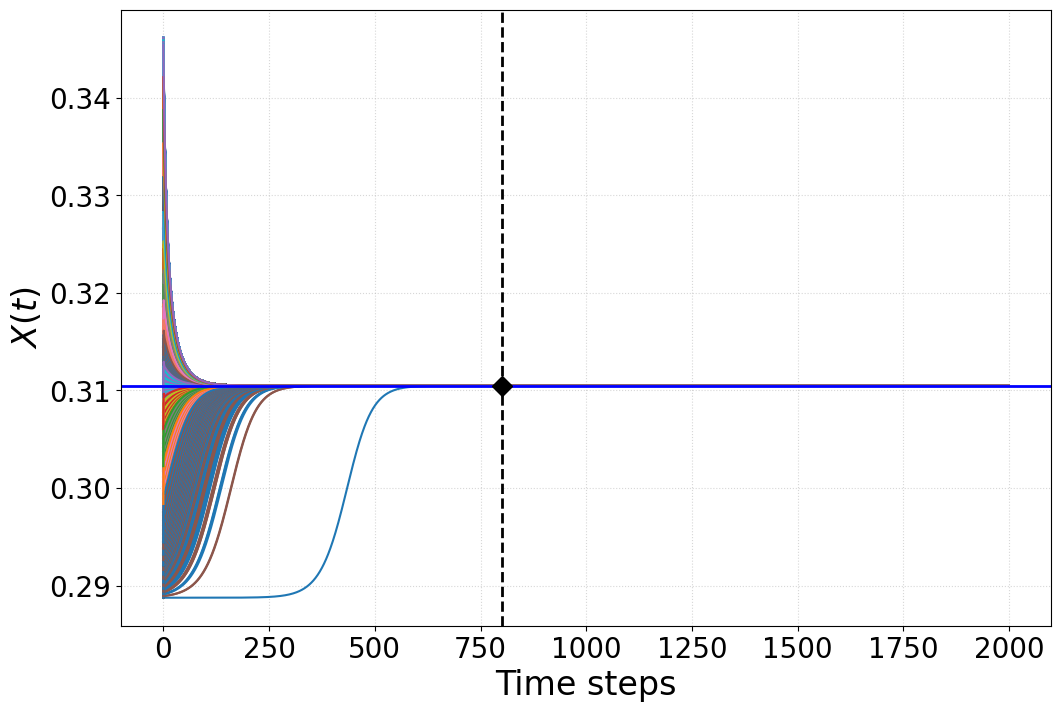

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

# Define the system parameters
R = 1.2
k1 = 0.5
k2 = 1.1
k3 = 0.01

def x_next(x_tm1, x_tm2, x_tm3, v_00, beta):
    g1_tm1 = -(v_00*0.5)*(x_tm1 - k1)**2
    g2_tm1 = -(v_00*0.5)*(x_tm1 - k2 * (np.tanh(x_tm3)) - k3 * (x_tm3))**2
    
    exp_beta_g1 = np.exp(beta * g1_tm1)
    exp_beta_g2 = np.exp(beta * g2_tm1)
    
    n1_tm1 = 1 / (1 + np.exp(beta*(g2_tm1 - g1_tm1)))
    n2_tm1 = 1 - n1_tm1
    
    h1 = k1
    h2 = k2 * (np.tanh(x_tm1)) + k3 * (x_tm1)
    
    x_next_val = (1 / R) * (n1_tm1 * h1 + n2_tm1 * h2)
    
    return x_next_val

def trajectory(x_crit, beta, v_00, epsilon_tm3, epsilon_tm2, epsilon_tm1, num_steps=2000):
    traj = []
    x_tm3 = x_crit + epsilon_tm3
    x_tm2 = x_crit + epsilon_tm2
    x_tm1 = x_crit + epsilon_tm1
    
    for _ in range(num_steps):
        y_t = x_next(x_tm1, x_tm2, x_tm3, v_00, beta)
        traj.append(y_t)
        x_tm3, x_tm2, x_tm1 = x_tm2, x_tm1, y_t
    
    return traj

# Define the critical values
beta_crit1 =np.array([111.85398175, 104.65733217, 85.40767596, 56.57057132, 29.06988374, 11.15691569])  
x_crit1 =np.array([0.06087668, 0.06092509, 0.06058729, 0.06104582, 0.06116604, 0.06132633])

beta_crit =np.array([169.08988624, 158.21077635, 129.11126391, 85.5175647, 43.94474309, 16.86573322])
x_crit =np.array([0.30022213, 0.30033455, 0.30017411, 0.30025771, 0.30035575, 0.30035233])

v_00 = np.array([0.40259952553523665, 0.43028426853378515, 0.527261813052645, 0.7960417160985619, 1.5491185672214862, 4.0363271071404885])

# Choose the index i manually (0 to 10)
i = 3  # Change this value to select a different beta_crit, x_crit, and v_00

# Fix beta_p
beta_p = 0.5  # You can adjust this value as needed
beta = beta_crit[i] - beta_p

# Define ranges for epsilon values
epsilon_range = np.linspace(-0.011509796, 0.05, 15)  # Adjust the range and number of values as needed

def check_convergence(traj, tolerance=1e-8, window=20):

    if len(traj) < window:
        return None
    
    for idx in range(len(traj) - window):
        if np.std(traj[idx:idx+window]) < tolerance:
            return (idx, np.mean(traj[idx:idx+window]))
    
    return None

# Calculate trajectories and check convergence
trajectories = []
convergence_points = []

for eps_tm3 in epsilon_range:
    for eps_tm2 in epsilon_range:
        for eps_tm1 in epsilon_range:
            traj = trajectory(x_crit[i], beta, v_00[i], eps_tm3, eps_tm2, eps_tm1)
            trajectories.append((traj, eps_tm3, eps_tm2, eps_tm1))
            
            conv_point = check_convergence(traj)
            if conv_point:
                convergence_points.append(conv_point)

# Find the overall convergence y-value
if convergence_points:
    overall_convergence_y = np.mean([point[1] for point in convergence_points])
    print(f"All trajectories are converging to y ≈ {overall_convergence_y:.6f}")

    # Find the trajectory that takes the longest time to converge
    slowest_convergence = max(convergence_points, key=lambda x: x[0])
    print(f"The trajectory that takes the longest to converge reaches the convergence point at time step {slowest_convergence[0]}, with y-value {slowest_convergence[1]:.6f}")
else:
    print("No convergence detected in the given number of steps.")
print(f"x_crit[{i}] = {x_crit[i]}, beta_crit[{i}] = {beta_crit[i]}, beta_p = {beta_p}, x_fixed_point = {overall_convergence_y:.6f}, beta = {beta}, tau = {slowest_convergence[0]}")

# Plotting
plt.figure(figsize=(12, 8))
for j, (traj, eps_tm3, eps_tm2, eps_tm1) in enumerate(trajectories):
    plt.plot(range(len(traj)), traj)

if convergence_points:
    plt.axhline(y=overall_convergence_y, color='blue', linewidth=2, linestyle='-')
    plt.axvline(x=slowest_convergence[0], color='black', linewidth=2, linestyle='--')
    plt.plot(slowest_convergence[0], slowest_convergence[1], 'kD', markersize=10)

plt.grid(True, linestyle=':', alpha=0.5)
plt.xticks(fontsize=20)
#plt.tick_params(axis='both', which='major', labelsize=20)
plt.yticks(fontsize=20)
#xticks = [0, 100, 200, 300, 400, 479, 500 ]
#plt.xticks(xticks, ['0', '100', '200', '300', '400', r'$\tau_r$', '500'])

#yticks = [0.28, 0.29, 0.30, 0.31, 0.319878, 0.32, 0.33, 0.34, 0.35 ]
#plt.yticks(yticks, ['0.28','0.29', '0.30', '0.31', r'$x^{*}$', '','0.33','0.34','0.35'])

plt.xlabel('Time steps', fontsize=24)
plt.ylabel(r'$X(t)$', fontsize=24)
#plt.xlim(0, 320)
#plt.ylim(0.27,0.35)
plt.savefig('n=3_trajectories_betap=0.5.jpg', dpi=300, bbox_inches='tight')

plt.show()

All trajectories are converging to y ≈ 0.311377
The trajectory that takes the longest to converge reaches the convergence point at time step 743, with y-value 0.311376
x_crit[3] = 0.30025771, beta_crit[3] = 85.5175647, beta_p = 0.6, x_fixed_point = 0.311377, beta = 84.9175647, tau = 743


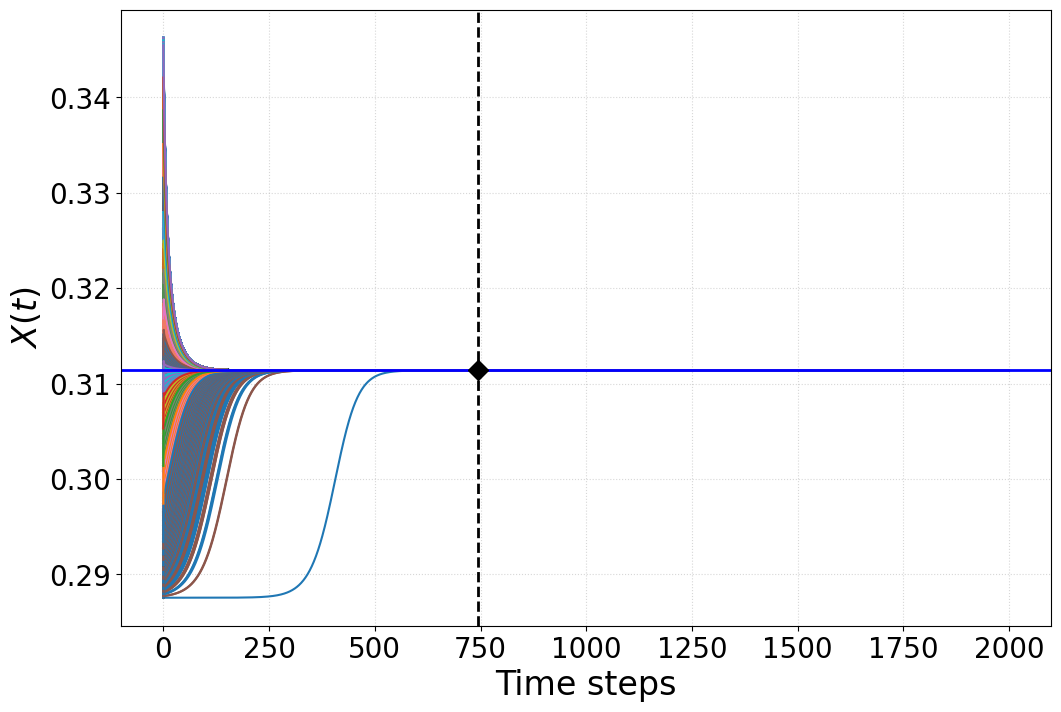

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

# Define the system parameters
R = 1.2
k1 = 0.5
k2 = 1.1
k3 = 0.01

def x_next(x_tm1, x_tm2, x_tm3, v_00, beta):
    g1_tm1 = -(v_00*0.5)*(x_tm1 - k1)**2
    g2_tm1 = -(v_00*0.5)*(x_tm1 - k2 * (np.tanh(x_tm3)) - k3 * (x_tm3))**2
    
    exp_beta_g1 = np.exp(beta * g1_tm1)
    exp_beta_g2 = np.exp(beta * g2_tm1)
    
    n1_tm1 = 1 / (1 + np.exp(beta*(g2_tm1 - g1_tm1)))
    n2_tm1 = 1 - n1_tm1
    
    h1 = k1
    h2 = k2 * (np.tanh(x_tm1)) + k3 * (x_tm1)
    
    x_next_val = (1 / R) * (n1_tm1 * h1 + n2_tm1 * h2)
    
    return x_next_val

def trajectory(x_crit, beta, v_00, epsilon_tm3, epsilon_tm2, epsilon_tm1, num_steps=2000):
    traj = []
    x_tm3 = x_crit + epsilon_tm3
    x_tm2 = x_crit + epsilon_tm2
    x_tm1 = x_crit + epsilon_tm1
    
    for _ in range(num_steps):
        y_t = x_next(x_tm1, x_tm2, x_tm3, v_00, beta)
        traj.append(y_t)
        x_tm3, x_tm2, x_tm1 = x_tm2, x_tm1, y_t
    
    return traj

# Define the critical values
beta_crit1 =np.array([111.85398175, 104.65733217, 85.40767596, 56.57057132, 29.06988374, 11.15691569])  
x_crit1 =np.array([0.06087668, 0.06092509, 0.06058729, 0.06104582, 0.06116604, 0.06132633])

beta_crit =np.array([169.08988624, 158.21077635, 129.11126391, 85.5175647, 43.94474309, 16.86573322])
x_crit =np.array([0.30022213, 0.30033455, 0.30017411, 0.30025771, 0.30035575, 0.30035233])

v_00 = np.array([0.40259952553523665, 0.43028426853378515, 0.527261813052645, 0.7960417160985619, 1.5491185672214862, 4.0363271071404885])

# Choose the index i manually (0 to 10)
i = 3  # Change this value to select a different beta_crit, x_crit, and v_00

# Fix beta_p
beta_p = 0.6  # You can adjust this value as needed
beta = beta_crit[i] - beta_p

# Define ranges for epsilon values
epsilon_range = np.linspace(-0.012720166, 0.05, 15)  # Adjust the range and number of values as needed

def check_convergence(traj, tolerance=1e-8, window=20):

    if len(traj) < window:
        return None
    
    for idx in range(len(traj) - window):
        if np.std(traj[idx:idx+window]) < tolerance:
            return (idx, np.mean(traj[idx:idx+window]))
    
    return None

# Calculate trajectories and check convergence
trajectories = []
convergence_points = []

for eps_tm3 in epsilon_range:
    for eps_tm2 in epsilon_range:
        for eps_tm1 in epsilon_range:
            traj = trajectory(x_crit[i], beta, v_00[i], eps_tm3, eps_tm2, eps_tm1)
            trajectories.append((traj, eps_tm3, eps_tm2, eps_tm1))
            
            conv_point = check_convergence(traj)
            if conv_point:
                convergence_points.append(conv_point)

# Find the overall convergence y-value
if convergence_points:
    overall_convergence_y = np.mean([point[1] for point in convergence_points])
    print(f"All trajectories are converging to y ≈ {overall_convergence_y:.6f}")

    # Find the trajectory that takes the longest time to converge
    slowest_convergence = max(convergence_points, key=lambda x: x[0])
    print(f"The trajectory that takes the longest to converge reaches the convergence point at time step {slowest_convergence[0]}, with y-value {slowest_convergence[1]:.6f}")
else:
    print("No convergence detected in the given number of steps.")
print(f"x_crit[{i}] = {x_crit[i]}, beta_crit[{i}] = {beta_crit[i]}, beta_p = {beta_p}, x_fixed_point = {overall_convergence_y:.6f}, beta = {beta}, tau = {slowest_convergence[0]}")

# Plotting
plt.figure(figsize=(12, 8))
for j, (traj, eps_tm3, eps_tm2, eps_tm1) in enumerate(trajectories):
    plt.plot(range(len(traj)), traj)

if convergence_points:
    plt.axhline(y=overall_convergence_y, color='blue', linewidth=2, linestyle='-')
    plt.axvline(x=slowest_convergence[0], color='black', linewidth=2, linestyle='--')
    plt.plot(slowest_convergence[0], slowest_convergence[1], 'kD', markersize=10)

plt.grid(True, linestyle=':', alpha=0.5)
plt.xticks(fontsize=20)
#plt.tick_params(axis='both', which='major', labelsize=20)
plt.yticks(fontsize=20)
#xticks = [0, 100, 200, 300, 400, 479, 500 ]
#plt.xticks(xticks, ['0', '100', '200', '300', '400', r'$\tau_r$', '500'])

#yticks = [0.28, 0.29, 0.30, 0.31, 0.319878, 0.32, 0.33, 0.34, 0.35 ]
#plt.yticks(yticks, ['0.28','0.29', '0.30', '0.31', r'$x^{*}$', '','0.33','0.34','0.35'])

plt.xlabel('Time steps', fontsize=24)
plt.ylabel(r'$X(t)$', fontsize=24)
#plt.xlim(0, 320)
#plt.ylim(0.27,0.35)
plt.savefig('n=3_trajectories_betap=0.6.jpg', dpi=300, bbox_inches='tight')

plt.show()

All trajectories are converging to y ≈ 0.312186
The trajectory that takes the longest to converge reaches the convergence point at time step 697, with y-value 0.312186
x_crit[3] = 0.30025771, beta_crit[3] = 85.5175647, beta_p = 0.7, x_fixed_point = 0.312186, beta = 84.81756469999999, tau = 697


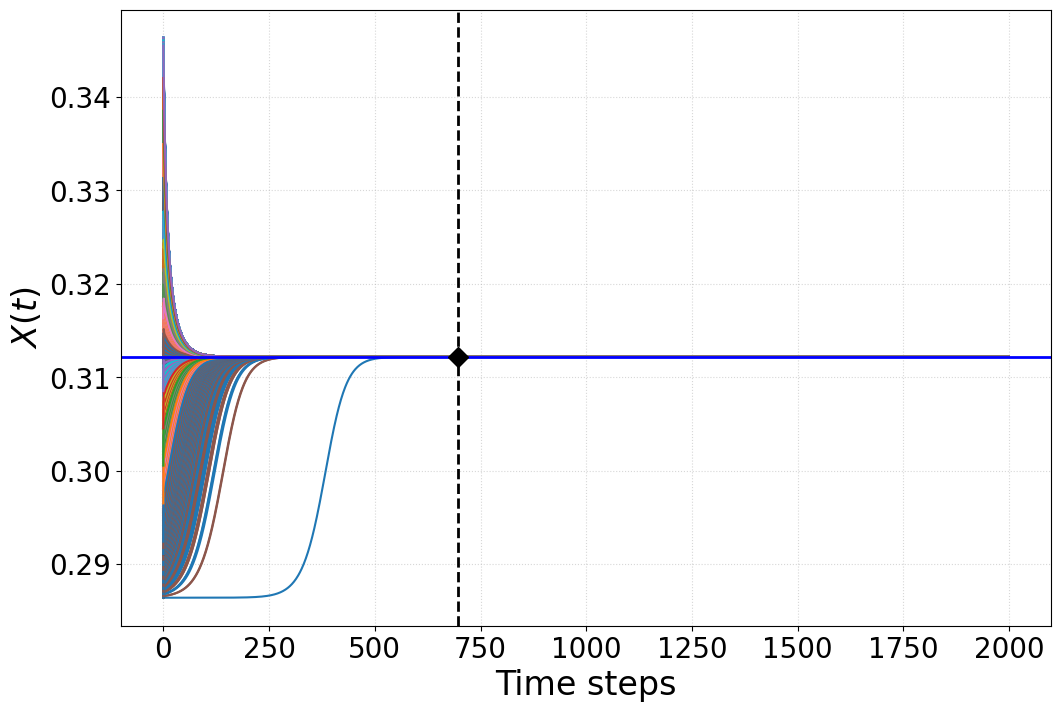

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

# Define the system parameters
R = 1.2
k1 = 0.5
k2 = 1.1
k3 = 0.01

def x_next(x_tm1, x_tm2, x_tm3, v_00, beta):
    g1_tm1 = -(v_00*0.5)*(x_tm1 - k1)**2
    g2_tm1 = -(v_00*0.5)*(x_tm1 - k2 * (np.tanh(x_tm3)) - k3 * (x_tm3))**2
    
    exp_beta_g1 = np.exp(beta * g1_tm1)
    exp_beta_g2 = np.exp(beta * g2_tm1)
    
    n1_tm1 = 1 / (1 + np.exp(beta*(g2_tm1 - g1_tm1)))
    n2_tm1 = 1 - n1_tm1
    
    h1 = k1
    h2 = k2 * (np.tanh(x_tm1)) + k3 * (x_tm1)
    
    x_next_val = (1 / R) * (n1_tm1 * h1 + n2_tm1 * h2)
    
    return x_next_val

def trajectory(x_crit, beta, v_00, epsilon_tm3, epsilon_tm2, epsilon_tm1, num_steps=2000):
    traj = []
    x_tm3 = x_crit + epsilon_tm3
    x_tm2 = x_crit + epsilon_tm2
    x_tm1 = x_crit + epsilon_tm1
    
    for _ in range(num_steps):
        y_t = x_next(x_tm1, x_tm2, x_tm3, v_00, beta)
        traj.append(y_t)
        x_tm3, x_tm2, x_tm1 = x_tm2, x_tm1, y_t
    
    return traj

# Define the critical values
beta_crit1 =np.array([111.85398175, 104.65733217, 85.40767596, 56.57057132, 29.06988374, 11.15691569])  
x_crit1 =np.array([0.06087668, 0.06092509, 0.06058729, 0.06104582, 0.06116604, 0.06132633])

beta_crit =np.array([169.08988624, 158.21077635, 129.11126391, 85.5175647, 43.94474309, 16.86573322])
x_crit =np.array([0.30022213, 0.30033455, 0.30017411, 0.30025771, 0.30035575, 0.30035233])

v_00 = np.array([0.40259952553523665, 0.43028426853378515, 0.527261813052645, 0.7960417160985619, 1.5491185672214862, 4.0363271071404885])

# Choose the index i manually (0 to 10)
i = 3  # Change this value to select a different beta_crit, x_crit, and v_00

# Fix beta_p
beta_p = 0.7  # You can adjust this value as needed
beta = beta_crit[i] - beta_p

# Define ranges for epsilon values
epsilon_range = np.linspace(-0.013849753, 0.05, 15)  # Adjust the range and number of values as needed

def check_convergence(traj, tolerance=1e-8, window=20):

    if len(traj) < window:
        return None
    
    for idx in range(len(traj) - window):
        if np.std(traj[idx:idx+window]) < tolerance:
            return (idx, np.mean(traj[idx:idx+window]))
    
    return None

# Calculate trajectories and check convergence
trajectories = []
convergence_points = []

for eps_tm3 in epsilon_range:
    for eps_tm2 in epsilon_range:
        for eps_tm1 in epsilon_range:
            traj = trajectory(x_crit[i], beta, v_00[i], eps_tm3, eps_tm2, eps_tm1)
            trajectories.append((traj, eps_tm3, eps_tm2, eps_tm1))
            
            conv_point = check_convergence(traj)
            if conv_point:
                convergence_points.append(conv_point)

# Find the overall convergence y-value
if convergence_points:
    overall_convergence_y = np.mean([point[1] for point in convergence_points])
    print(f"All trajectories are converging to y ≈ {overall_convergence_y:.6f}")

    # Find the trajectory that takes the longest time to converge
    slowest_convergence = max(convergence_points, key=lambda x: x[0])
    print(f"The trajectory that takes the longest to converge reaches the convergence point at time step {slowest_convergence[0]}, with y-value {slowest_convergence[1]:.6f}")
else:
    print("No convergence detected in the given number of steps.")
print(f"x_crit[{i}] = {x_crit[i]}, beta_crit[{i}] = {beta_crit[i]}, beta_p = {beta_p}, x_fixed_point = {overall_convergence_y:.6f}, beta = {beta}, tau = {slowest_convergence[0]}")

# Plotting
plt.figure(figsize=(12, 8))
for j, (traj, eps_tm3, eps_tm2, eps_tm1) in enumerate(trajectories):
    plt.plot(range(len(traj)), traj)

if convergence_points:
    plt.axhline(y=overall_convergence_y, color='blue', linewidth=2, linestyle='-')
    plt.axvline(x=slowest_convergence[0], color='black', linewidth=2, linestyle='--')
    plt.plot(slowest_convergence[0], slowest_convergence[1], 'kD', markersize=10)

plt.grid(True, linestyle=':', alpha=0.5)
plt.xticks(fontsize=20)
#plt.tick_params(axis='both', which='major', labelsize=20)
plt.yticks(fontsize=20)
#xticks = [0, 100, 200, 300, 400, 479, 500 ]
#plt.xticks(xticks, ['0', '100', '200', '300', '400', r'$\tau_r$', '500'])

#yticks = [0.28, 0.29, 0.30, 0.31, 0.319878, 0.32, 0.33, 0.34, 0.35 ]
#plt.yticks(yticks, ['0.28','0.29', '0.30', '0.31', r'$x^{*}$', '','0.33','0.34','0.35'])

plt.xlabel('Time steps', fontsize=24)
plt.ylabel(r'$X(t)$', fontsize=24)
#plt.xlim(0, 320)
#plt.ylim(0.27,0.35)
plt.savefig('n=3_trajectories_betap=0.7.jpg', dpi=300, bbox_inches='tight')

plt.show()

All trajectories are converging to y ≈ 0.312931
The trajectory that takes the longest to converge reaches the convergence point at time step 659, with y-value 0.312931
x_crit[3] = 0.30025771, beta_crit[3] = 85.5175647, beta_p = 0.8, x_fixed_point = 0.312931, beta = 84.7175647, tau = 659


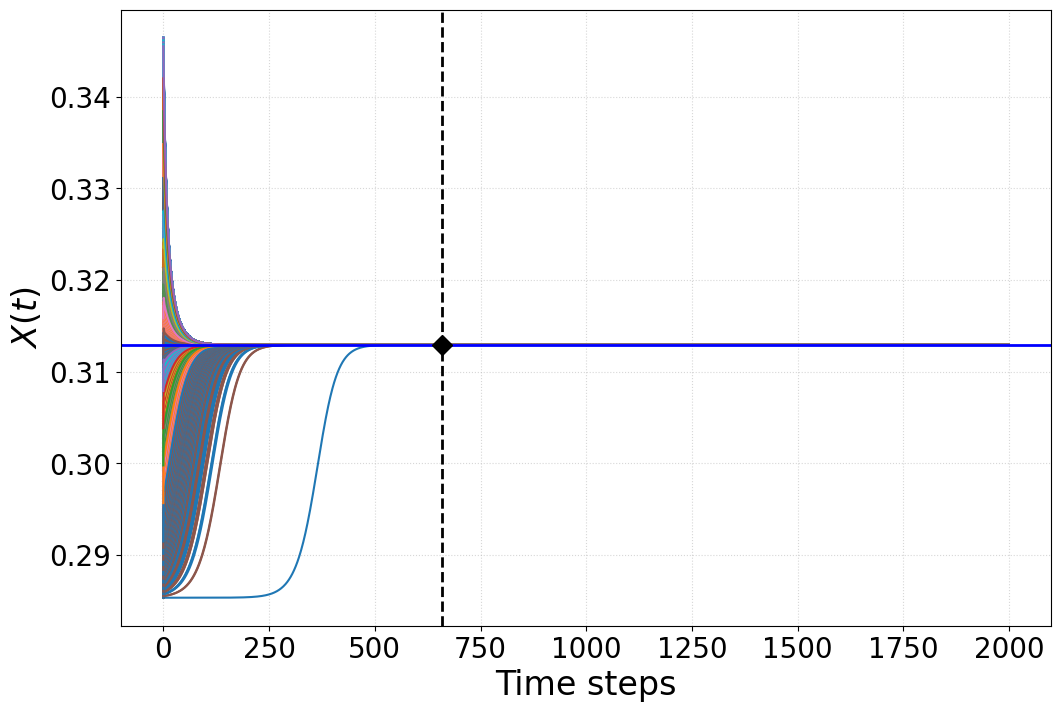

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

# Define the system parameters
R = 1.2
k1 = 0.5
k2 = 1.1
k3 = 0.01

def x_next(x_tm1, x_tm2, x_tm3, v_00, beta):
    g1_tm1 = -(v_00*0.5)*(x_tm1 - k1)**2
    g2_tm1 = -(v_00*0.5)*(x_tm1 - k2 * (np.tanh(x_tm3)) - k3 * (x_tm3))**2
    
    exp_beta_g1 = np.exp(beta * g1_tm1)
    exp_beta_g2 = np.exp(beta * g2_tm1)
    
    n1_tm1 = 1 / (1 + np.exp(beta*(g2_tm1 - g1_tm1)))
    n2_tm1 = 1 - n1_tm1
    
    h1 = k1
    h2 = k2 * (np.tanh(x_tm1)) + k3 * (x_tm1)
    
    x_next_val = (1 / R) * (n1_tm1 * h1 + n2_tm1 * h2)
    
    return x_next_val

def trajectory(x_crit, beta, v_00, epsilon_tm3, epsilon_tm2, epsilon_tm1, num_steps=2000):
    traj = []
    x_tm3 = x_crit + epsilon_tm3
    x_tm2 = x_crit + epsilon_tm2
    x_tm1 = x_crit + epsilon_tm1
    
    for _ in range(num_steps):
        y_t = x_next(x_tm1, x_tm2, x_tm3, v_00, beta)
        traj.append(y_t)
        x_tm3, x_tm2, x_tm1 = x_tm2, x_tm1, y_t
    
    return traj

# Define the critical values
beta_crit1 =np.array([111.85398175, 104.65733217, 85.40767596, 56.57057132, 29.06988374, 11.15691569])  
x_crit1 =np.array([0.06087668, 0.06092509, 0.06058729, 0.06104582, 0.06116604, 0.06132633])

beta_crit =np.array([169.08988624, 158.21077635, 129.11126391, 85.5175647, 43.94474309, 16.86573322])
x_crit =np.array([0.30022213, 0.30033455, 0.30017411, 0.30025771, 0.30035575, 0.30035233])

v_00 = np.array([0.40259952553523665, 0.43028426853378515, 0.527261813052645, 0.7960417160985619, 1.5491185672214862, 4.0363271071404885])

# Choose the index i manually (0 to 10)
i = 3  # Change this value to select a different beta_crit, x_crit, and v_00

# Fix beta_p
beta_p = 0.8  # You can adjust this value as needed
beta = beta_crit[i] - beta_p

# Define ranges for epsilon values
epsilon_range = np.linspace(-0.014915712, 0.05, 15)  # Adjust the range and number of values as needed

def check_convergence(traj, tolerance=1e-8, window=20):

    if len(traj) < window:
        return None
    
    for idx in range(len(traj) - window):
        if np.std(traj[idx:idx+window]) < tolerance:
            return (idx, np.mean(traj[idx:idx+window]))
    
    return None

# Calculate trajectories and check convergence
trajectories = []
convergence_points = []

for eps_tm3 in epsilon_range:
    for eps_tm2 in epsilon_range:
        for eps_tm1 in epsilon_range:
            traj = trajectory(x_crit[i], beta, v_00[i], eps_tm3, eps_tm2, eps_tm1)
            trajectories.append((traj, eps_tm3, eps_tm2, eps_tm1))
            
            conv_point = check_convergence(traj)
            if conv_point:
                convergence_points.append(conv_point)

# Find the overall convergence y-value
if convergence_points:
    overall_convergence_y = np.mean([point[1] for point in convergence_points])
    print(f"All trajectories are converging to y ≈ {overall_convergence_y:.6f}")

    # Find the trajectory that takes the longest time to converge
    slowest_convergence = max(convergence_points, key=lambda x: x[0])
    print(f"The trajectory that takes the longest to converge reaches the convergence point at time step {slowest_convergence[0]}, with y-value {slowest_convergence[1]:.6f}")
else:
    print("No convergence detected in the given number of steps.")
print(f"x_crit[{i}] = {x_crit[i]}, beta_crit[{i}] = {beta_crit[i]}, beta_p = {beta_p}, x_fixed_point = {overall_convergence_y:.6f}, beta = {beta}, tau = {slowest_convergence[0]}")

# Plotting
plt.figure(figsize=(12, 8))
for j, (traj, eps_tm3, eps_tm2, eps_tm1) in enumerate(trajectories):
    plt.plot(range(len(traj)), traj)

if convergence_points:
    plt.axhline(y=overall_convergence_y, color='blue', linewidth=2, linestyle='-')
    plt.axvline(x=slowest_convergence[0], color='black', linewidth=2, linestyle='--')
    plt.plot(slowest_convergence[0], slowest_convergence[1], 'kD', markersize=10)

plt.grid(True, linestyle=':', alpha=0.5)
plt.xticks(fontsize=20)
#plt.tick_params(axis='both', which='major', labelsize=20)
plt.yticks(fontsize=20)
#xticks = [0, 100, 200, 300, 400, 479, 500 ]
#plt.xticks(xticks, ['0', '100', '200', '300', '400', r'$\tau_r$', '500'])

#yticks = [0.28, 0.29, 0.30, 0.31, 0.319878, 0.32, 0.33, 0.34, 0.35 ]
#plt.yticks(yticks, ['0.28','0.29', '0.30', '0.31', r'$x^{*}$', '','0.33','0.34','0.35'])

plt.xlabel('Time steps', fontsize=24)
plt.ylabel(r'$X(t)$', fontsize=24)
#plt.xlim(0, 320)
#plt.ylim(0.27,0.35)
plt.savefig('n=3_trajectories_betap=0.8.jpg', dpi=300, bbox_inches='tight')

plt.show()

All trajectories are converging to y ≈ 0.313623
The trajectory that takes the longest to converge reaches the convergence point at time step 628, with y-value 0.313623
x_crit[3] = 0.30025771, beta_crit[3] = 85.5175647, beta_p = 0.9, x_fixed_point = 0.313623, beta = 84.61756469999999, tau = 628


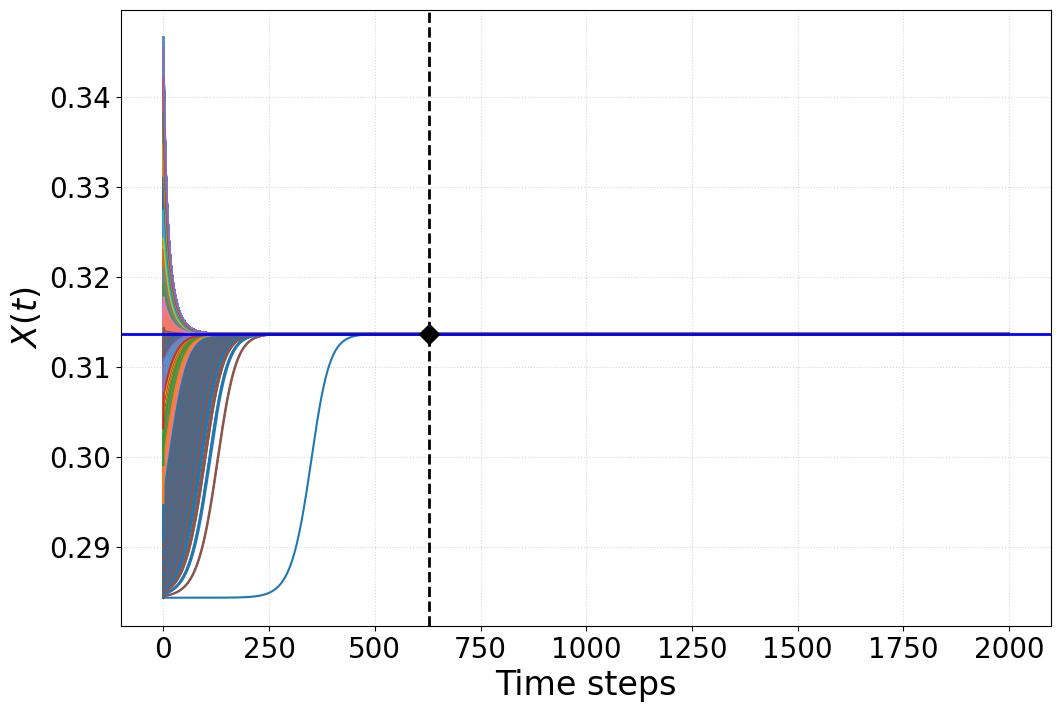

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

# Define the system parameters
R = 1.2
k1 = 0.5
k2 = 1.1
k3 = 0.01

def x_next(x_tm1, x_tm2, x_tm3, v_00, beta):
    g1_tm1 = -(v_00*0.5)*(x_tm1 - k1)**2
    g2_tm1 = -(v_00*0.5)*(x_tm1 - k2 * (np.tanh(x_tm3)) - k3 * (x_tm3))**2
    
    exp_beta_g1 = np.exp(beta * g1_tm1)
    exp_beta_g2 = np.exp(beta * g2_tm1)
    
    n1_tm1 = 1 / (1 + np.exp(beta*(g2_tm1 - g1_tm1)))
    n2_tm1 = 1 - n1_tm1
    
    h1 = k1
    h2 = k2 * (np.tanh(x_tm1)) + k3 * (x_tm1)
    
    x_next_val = (1 / R) * (n1_tm1 * h1 + n2_tm1 * h2)
    
    return x_next_val

def trajectory(x_crit, beta, v_00, epsilon_tm3, epsilon_tm2, epsilon_tm1, num_steps=2000):
    traj = []
    x_tm3 = x_crit + epsilon_tm3
    x_tm2 = x_crit + epsilon_tm2
    x_tm1 = x_crit + epsilon_tm1
    
    for _ in range(num_steps):
        y_t = x_next(x_tm1, x_tm2, x_tm3, v_00, beta)
        traj.append(y_t)
        x_tm3, x_tm2, x_tm1 = x_tm2, x_tm1, y_t
    
    return traj

# Define the critical values
beta_crit1 =np.array([111.85398175, 104.65733217, 85.40767596, 56.57057132, 29.06988374, 11.15691569])  
x_crit1 =np.array([0.06087668, 0.06092509, 0.06058729, 0.06104582, 0.06116604, 0.06132633])

beta_crit =np.array([169.08988624, 158.21077635, 129.11126391, 85.5175647, 43.94474309, 16.86573322])
x_crit =np.array([0.30022213, 0.30033455, 0.30017411, 0.30025771, 0.30035575, 0.30035233])

v_00 = np.array([0.40259952553523665, 0.43028426853378515, 0.527261813052645, 0.7960417160985619, 1.5491185672214862, 4.0363271071404885])

# Choose the index i manually (0 to 10)
i = 3  # Change this value to select a different beta_crit, x_crit, and v_00

# Fix beta_p
beta_p = 0.9  # You can adjust this value as needed
beta = beta_crit[i] - beta_p

# Define ranges for epsilon values
epsilon_range = np.linspace(-0.015929946, 0.05, 15)  # Adjust the range and number of values as needed

def check_convergence(traj, tolerance=1e-8, window=20):

    if len(traj) < window:
        return None
    
    for idx in range(len(traj) - window):
        if np.std(traj[idx:idx+window]) < tolerance:
            return (idx, np.mean(traj[idx:idx+window]))
    
    return None

# Calculate trajectories and check convergence
trajectories = []
convergence_points = []

for eps_tm3 in epsilon_range:
    for eps_tm2 in epsilon_range:
        for eps_tm1 in epsilon_range:
            traj = trajectory(x_crit[i], beta, v_00[i], eps_tm3, eps_tm2, eps_tm1)
            trajectories.append((traj, eps_tm3, eps_tm2, eps_tm1))
            
            conv_point = check_convergence(traj)
            if conv_point:
                convergence_points.append(conv_point)

# Find the overall convergence y-value
if convergence_points:
    overall_convergence_y = np.mean([point[1] for point in convergence_points])
    print(f"All trajectories are converging to y ≈ {overall_convergence_y:.6f}")

    # Find the trajectory that takes the longest time to converge
    slowest_convergence = max(convergence_points, key=lambda x: x[0])
    print(f"The trajectory that takes the longest to converge reaches the convergence point at time step {slowest_convergence[0]}, with y-value {slowest_convergence[1]:.6f}")
else:
    print("No convergence detected in the given number of steps.")
print(f"x_crit[{i}] = {x_crit[i]}, beta_crit[{i}] = {beta_crit[i]}, beta_p = {beta_p}, x_fixed_point = {overall_convergence_y:.6f}, beta = {beta}, tau = {slowest_convergence[0]}")

# Plotting
plt.figure(figsize=(12, 8))
for j, (traj, eps_tm3, eps_tm2, eps_tm1) in enumerate(trajectories):
    plt.plot(range(len(traj)), traj)

if convergence_points:
    plt.axhline(y=overall_convergence_y, color='blue', linewidth=2, linestyle='-')
    plt.axvline(x=slowest_convergence[0], color='black', linewidth=2, linestyle='--')
    plt.plot(slowest_convergence[0], slowest_convergence[1], 'kD', markersize=10)

plt.grid(True, linestyle=':', alpha=0.5)
plt.xticks(fontsize=20)
#plt.tick_params(axis='both', which='major', labelsize=20)
plt.yticks(fontsize=20)
#xticks = [0, 100, 200, 300, 400, 479, 500 ]
#plt.xticks(xticks, ['0', '100', '200', '300', '400', r'$\tau_r$', '500'])

#yticks = [0.28, 0.29, 0.30, 0.31, 0.319878, 0.32, 0.33, 0.34, 0.35 ]
#plt.yticks(yticks, ['0.28','0.29', '0.30', '0.31', r'$x^{*}$', '','0.33','0.34','0.35'])

plt.xlabel('Time steps', fontsize=24)
plt.ylabel(r'$X(t)$', fontsize=24)
#plt.xlim(0, 320)
#plt.ylim(0.27,0.35)
plt.savefig('n=3_trajectories_betap=0.9.jpg', dpi=300, bbox_inches='tight')

plt.show()

All trajectories are converging to y ≈ 0.314272
The trajectory that takes the longest to converge reaches the convergence point at time step 602, with y-value 0.314272
x_crit[3] = 0.30025771, beta_crit[3] = 85.5175647, beta_p = 1, x_fixed_point = 0.314272, beta = 84.5175647, tau = 602


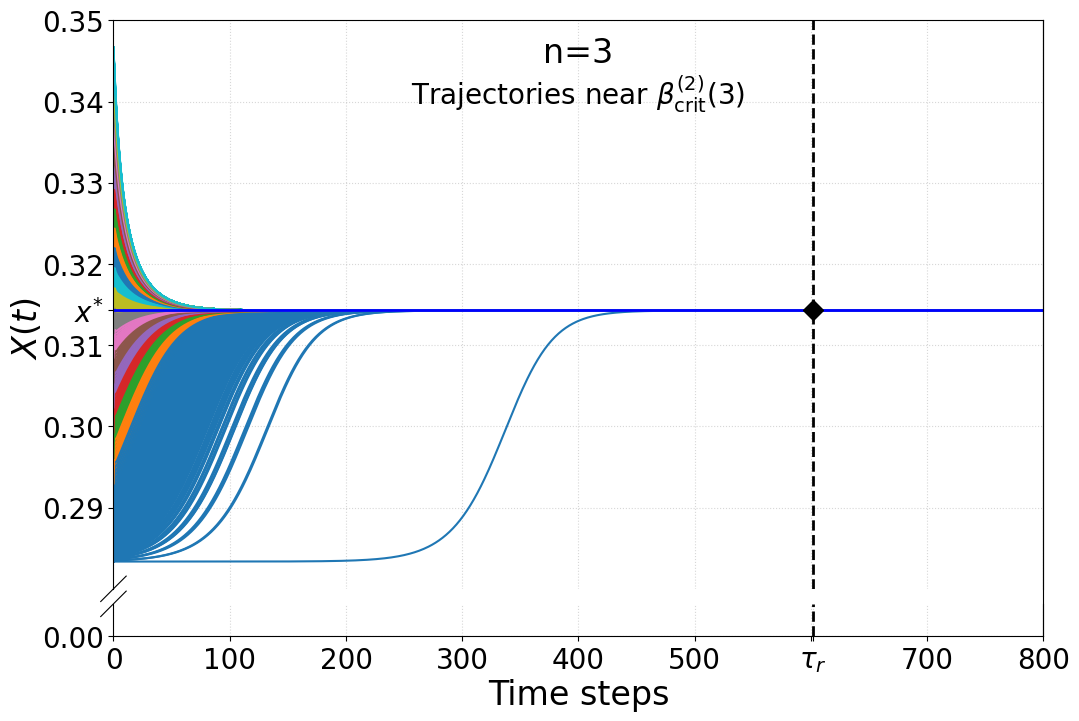

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
from brokenaxes import brokenaxes

# Define the system parameters
R = 1.2
k1 = 0.5
k2 = 1.1
k3 = 0.01

def x_next(x_tm1, x_tm2, x_tm3, v_00, beta):
    g1_tm1 = -(v_00*0.5)*(x_tm1 - k1)**2
    g2_tm1 = -(v_00*0.5)*(x_tm1 - k2 * (np.tanh(x_tm3)) - k3 * (x_tm3))**2
    
    exp_beta_g1 = np.exp(beta * g1_tm1)
    exp_beta_g2 = np.exp(beta * g2_tm1)
    
    n1_tm1 = 1 / (1 + np.exp(beta*(g2_tm1 - g1_tm1)))
    n2_tm1 = 1 - n1_tm1
    
    h1 = k1
    h2 = k2 * (np.tanh(x_tm1)) + k3 * (x_tm1)
    
    x_next_val = (1 / R) * (n1_tm1 * h1 + n2_tm1 * h2)
    
    return x_next_val

def trajectory(x_crit, beta, v_00, epsilon_tm3, epsilon_tm2, epsilon_tm1, num_steps=2000):
    traj = []
    x_tm3 = x_crit + epsilon_tm3
    x_tm2 = x_crit + epsilon_tm2
    x_tm1 = x_crit + epsilon_tm1
    
    for _ in range(num_steps):
        y_t = x_next(x_tm1, x_tm2, x_tm3, v_00, beta)
        traj.append(y_t)
        x_tm3, x_tm2, x_tm1 = x_tm2, x_tm1, y_t
    
    return traj

# Define the critical values
beta_crit1 = np.array([111.85398175, 104.65733217, 85.40767596, 56.57057132, 29.06988374, 11.15691569])  
x_crit1 = np.array([0.06087668, 0.06092509, 0.06058729, 0.06104582, 0.06116604, 0.06132633])

beta_crit = np.array([169.08988624, 158.21077635, 129.11126391, 85.5175647, 43.94474309, 16.86573322])
x_crit = np.array([0.30022213, 0.30033455, 0.30017411, 0.30025771, 0.30035575, 0.30035233])

v_00 = np.array([0.40259952553523665, 0.43028426853378515, 0.527261813052645, 0.7960417160985619, 1.5491185672214862, 4.0363271071404885])

# Choose the index i manually (0 to 10)
i = 3  # Change this value to select a different beta_crit, x_crit, and v_00

# Fix beta_p
beta_p = 1  # You can adjust this value as needed
beta = beta_crit[i] - beta_p

# Define ranges for epsilon values
epsilon_range = np.linspace(-0.016901113, 0.05, 20)   # Adjust the range and number of values as needed

def check_convergence(traj, tolerance=1e-8, window=20):
    if len(traj) < window:
        return None
    
    for idx in range(len(traj) - window):
        if np.std(traj[idx:idx+window]) < tolerance:
            return (idx, np.mean(traj[idx:idx+window]))
    
    return None

# Calculate trajectories and check convergence
trajectories = []
convergence_points = []

for eps_tm3 in epsilon_range:
    for eps_tm2 in epsilon_range:
        for eps_tm1 in epsilon_range:
            traj = trajectory(x_crit[i], beta, v_00[i], eps_tm3, eps_tm2, eps_tm1)
            trajectories.append((traj, eps_tm3, eps_tm2, eps_tm1))
            
            conv_point = check_convergence(traj)
            if conv_point:
                convergence_points.append(conv_point)

# Find the overall convergence y-value
if convergence_points:
    overall_convergence_y = np.mean([point[1] for point in convergence_points])
    print(f"All trajectories are converging to y ≈ {overall_convergence_y:.6f}")

    # Find the trajectory that takes the longest time to converge
    slowest_convergence = max(convergence_points, key=lambda x: x[0])
    print(f"The trajectory that takes the longest to converge reaches the convergence point at time step {slowest_convergence[0]}, with y-value {slowest_convergence[1]:.6f}")
else:
    print("No convergence detected in the given number of steps.")
print(f"x_crit[{i}] = {x_crit[i]}, beta_crit[{i}] = {beta_crit[i]}, beta_p = {beta_p}, x_fixed_point = {overall_convergence_y:.6f}, beta = {beta}, tau = {slowest_convergence[0]}")

# Plotting
plt.figure(figsize=(12, 8))
brax = brokenaxes(ylims=((0, 0.004), (0.28, 0.35)), d=0.015, hspace=0.05) 
for j, (traj, eps_tm3, eps_tm2, eps_tm1) in enumerate(trajectories):
    brax.plot(range(len(traj)), traj)

if convergence_points:
    brax.axhline(y=overall_convergence_y, color='blue', linewidth=2, linestyle='-')
    brax.axvline(x=slowest_convergence[0], color='black', linewidth=2, linestyle='--')
    brax.plot(slowest_convergence[0], slowest_convergence[1], 'kD', markersize=10)

brax.grid(True, linestyle=':', alpha=0.5)
brax.tick_params(labelsize=20) 
brax.set_xlabel('Time steps', labelpad=30, fontsize=24)
brax.set_ylabel(r'$X(t)$', labelpad=50, fontsize=24)
brax.set_xlim(0.0, 800)

# Define ticks and labels
xticks = [0, 100, 200, 300, 400, 500, 600, 602, 700, 800  ]
xticklabels = ['0', '100', '200', '300', '400', '500', '', r'$\tau_r$', '700', '800']

yticks1 = [0.29, 0.30, 0.31, 0.314272, 0.32, 0.33, 0.34, 0.35]
yticklabels1=['0.29', '0.30', '0.31', r'$x^{*}$', '0.32', '0.33', '0.34', '0.35']

yticks2=[0.0]
yticklabels2=['0.00']

# Set x-ticks and labels for both subplots

# Set y-ticks and labels for each subplot
brax.axs[1].yaxis.set_major_locator(FixedLocator(yticks2))
brax.axs[1].set_yticklabels(yticklabels2)

brax.axs[0].yaxis.set_major_locator(FixedLocator(yticks1))
brax.axs[0].set_yticklabels(yticklabels1)

# Adjust other axis properties
for ax in brax.axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(True)
    ax.tick_params(top=False, right=False)
    
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

brax.big_ax.spines['top'].set_visible(True)
brax.big_ax.spines['right'].set_visible(True)
brax.big_ax.tick_params(top=False, right=False)

brax.text(400, 0.346, 'n=3', fontsize=24, color='black', ha='center', va='center')
brax.text(400, 0.341, r'$\text{Trajectories near}~\beta^{(2)}_\text{crit}(3)$', fontsize=20, color='black', ha='center', va='center')


# Saving and showing the plot
plt.savefig('broken_n=3_trajectories_betap=1.jpg', dpi=300, bbox_inches='tight')
plt.show()
